In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


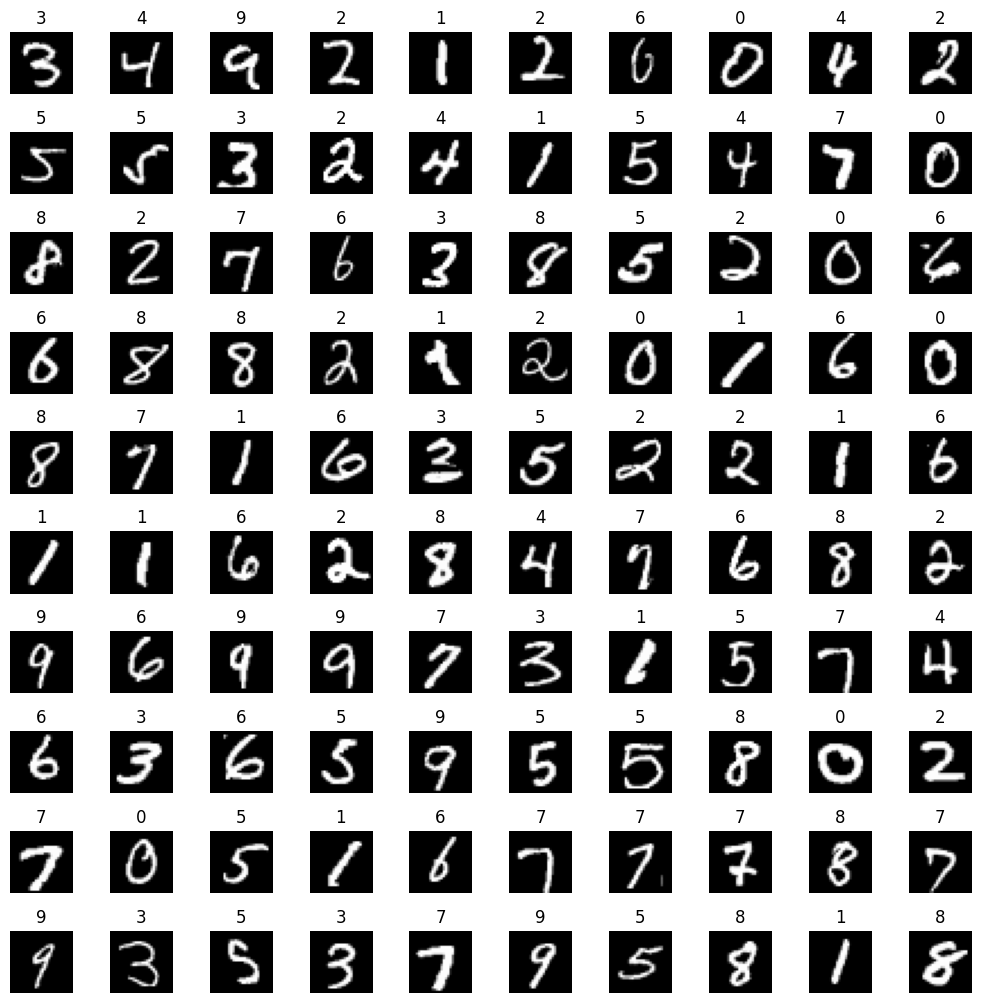

In [4]:
test_length, img_width, img_height = x_train.shape

fig, axs = plt.subplots(10,10, figsize=(10,10))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axs.flat):    
    random_index = np.random.randint(test_length)
    random_x = x_train[random_index]
    random_y = y_train[random_index]
    
    ax.imshow(random_x, cmap='gray')
    ax.set_title(random_y)
    ax.set_axis_off()

In [5]:
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

print(y_train.shape)

(60000,)


In [16]:
model = Sequential(
    [
        tf.keras.Input(shape=(img_width, img_height)),
        tf.keras.layers.Flatten(),
        Dense(units=32, activation='relu'),
        Dense(units=10, activation='softmax'),
    ]
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - loss: 7.7090 - sparse_categorical_accuracy: 0.7088
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - loss: 0.5790 - sparse_categorical_accuracy: 0.8509
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - loss: 0.3883 - sparse_categorical_accuracy: 0.9029
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - loss: 0.3083 - sparse_categorical_accuracy: 0.9225
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - loss: 0.2618 - sparse_categorical_accuracy: 0.9322
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - loss: 0.2446 - sparse_categorical_accuracy: 0.9365
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - loss: 0.2190 - sparse_categorical_accuracy: 0.9430
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - loss: 0.2125 - sparse_categorical_accuracy: 0.9460
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - loss: 0.2059 - sparse_categorical_accuracy: 0.9470
Epoch 10/20
1875/18

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.3550 - sparse_categorical_accuracy: 0.9328
Test Accuracy: 0.9391


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

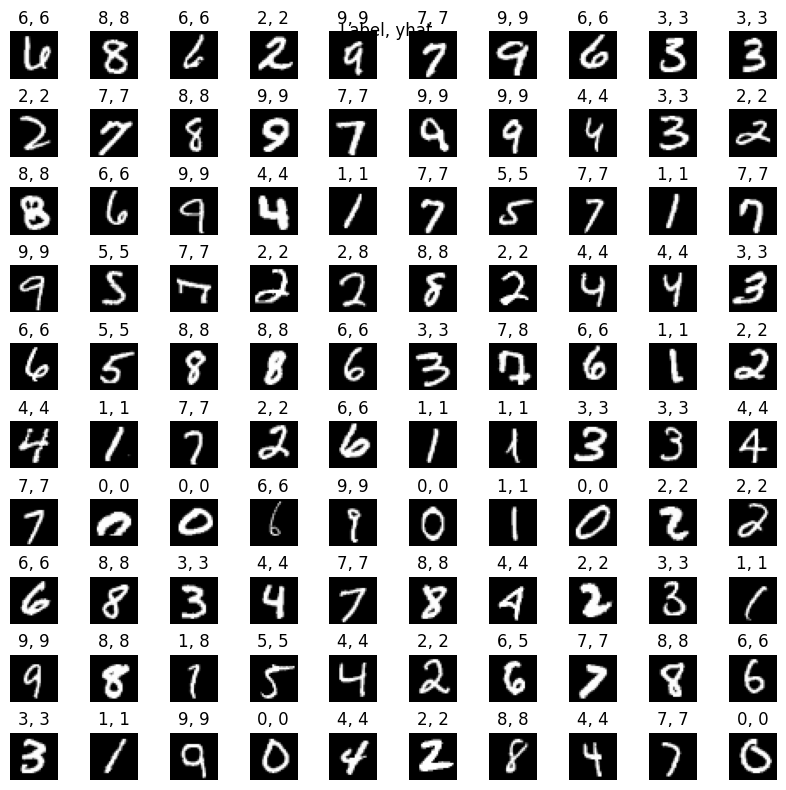

In [19]:
fig, axs = plt.subplots(10, 10, figsize=(8,8))
fig.suptitle("Label, yhat")
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axs.flat):
    random_test_index = np.random.randint(x_test.shape[0])
    random_test_x = x_test[random_test_index]
    random_test_y = y_test[random_test_index]
    
    random_test_x_batch = np.expand_dims(random_test_x, axis=0)
    random_test_prob = model.predict(random_test_x_batch)
    
    predicted_digit = np.argmax(random_test_prob)
    actual_digit = random_test_y 
    
    ax.imshow(random_test_x, cmap='gray')
    ax.set_title(f"{actual_digit}, {predicted_digit}")
    ax.set_axis_off()